# Jupyter Notebook to Analyize and Visualize Dopaminergic Neuron Quantification csv data (Kristen's Data)

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop


In [11]:
CurvedCEP = pd.read_csv(chooser.selected)

In [13]:
print(CurvedCEP)
CurvedCEP = CurvedCEP.dropna(axis=1)
print("-"*50)
print(CurvedCEP)

         Genotype  4 D.O.  7 D.O.  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0        Wildtype       0       7         NaN         NaN         NaN   
1        TH•cat-2       8      35         NaN         NaN         NaN   
2    PINK1•pink-1       4      35         NaN         NaN         NaN   
3      PRKN•pdr-1       8      25         NaN         NaN         NaN   
4    VPS35•vps-35      19      46         NaN         NaN         NaN   
5  ATP13A2•catp-7      21      35         NaN         NaN         NaN   
6     DJ1•djr-1.1      25      65         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN         NaN         NaN         NaN          NaN          NaN   
4         NaN       

In [18]:
CurvedCEP = pd.melt(CurvedCEP, id_vars = ['Genotype'], value_vars = ['4 D.O.', '7 D.O.'], var_name = 'Age', value_name = '% Worms')
print(CurvedCEP)

          Genotype     Age  % Worms
0         Wildtype  4 D.O.        0
1         TH•cat-2  4 D.O.        8
2     PINK1•pink-1  4 D.O.        4
3       PRKN•pdr-1  4 D.O.        8
4     VPS35•vps-35  4 D.O.       19
5   ATP13A2•catp-7  4 D.O.       21
6      DJ1•djr-1.1  4 D.O.       25
7         Wildtype  7 D.O.        7
8         TH•cat-2  7 D.O.       35
9     PINK1•pink-1  7 D.O.       35
10      PRKN•pdr-1  7 D.O.       25
11    VPS35•vps-35  7 D.O.       46
12  ATP13A2•catp-7  7 D.O.       35
13     DJ1•djr-1.1  7 D.O.       65


In [23]:
RoundedCEP = pd.read_csv(chooser.selected)

In [24]:
print(RoundedCEP)
RoundedCEP = RoundedCEP.drop(index=[7,8,9,10]).dropna(axis=1)
print("-"*50)
print(RoundedCEP)

          Genotype  4 D.O.  7 D.O.  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0         Wildtype     0.0     0.0         NaN         NaN         NaN   
1         TH•cat-2     0.0    35.0         NaN         NaN         NaN   
2     PINK1•pink-1     0.0    84.0         NaN         NaN         NaN   
3       PRKN•pdr-1    13.0    45.0         NaN         NaN         NaN   
4     VPS35•vps-35    39.0    70.0         NaN         NaN         NaN   
5   ATP13A2•catp-7    35.0    41.0         NaN         NaN         NaN   
6      DJ1•djr-1.1    31.0    60.0         NaN         NaN         NaN   
7              NaN     NaN     NaN         NaN         NaN         NaN   
8              NaN     NaN     NaN         NaN         NaN         NaN   
9              NaN     NaN     NaN         NaN         NaN         NaN   
10             NaN     NaN     NaN         NaN         NaN         NaN   

    Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0          NaN         NaN     

In [25]:
print(RoundedCEP)
RoundedCEP = pd.melt(RoundedCEP, id_vars = ['Genotype'], value_vars = ['4 D.O.', '7 D.O.'], var_name = 'Age', value_name = '% Worms')
print(RoundedCEP)

         Genotype  4 D.O.  7 D.O.
0        Wildtype     0.0     0.0
1        TH•cat-2     0.0    35.0
2    PINK1•pink-1     0.0    84.0
3      PRKN•pdr-1    13.0    45.0
4    VPS35•vps-35    39.0    70.0
5  ATP13A2•catp-7    35.0    41.0
6     DJ1•djr-1.1    31.0    60.0
          Genotype     Age  % Worms
0         Wildtype  4 D.O.      0.0
1         TH•cat-2  4 D.O.      0.0
2     PINK1•pink-1  4 D.O.      0.0
3       PRKN•pdr-1  4 D.O.     13.0
4     VPS35•vps-35  4 D.O.     39.0
5   ATP13A2•catp-7  4 D.O.     35.0
6      DJ1•djr-1.1  4 D.O.     31.0
7         Wildtype  7 D.O.      0.0
8         TH•cat-2  7 D.O.     35.0
9     PINK1•pink-1  7 D.O.     84.0
10      PRKN•pdr-1  7 D.O.     45.0
11    VPS35•vps-35  7 D.O.     70.0
12  ATP13A2•catp-7  7 D.O.     41.0
13     DJ1•djr-1.1  7 D.O.     60.0


# Bar Plots:

<Figure size 640x480 with 0 Axes>

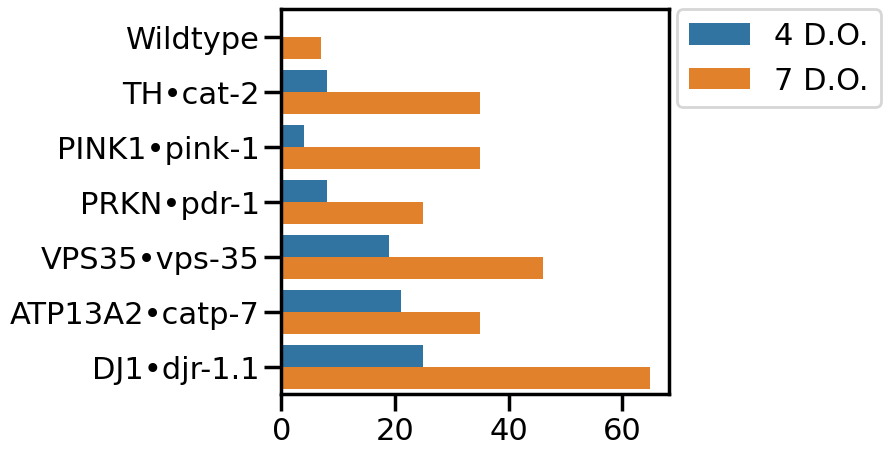

In [29]:
Title = "" #<---------------- Input Here -----------------
FileName = "Curved CEP Dendrites"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="% Worms", 
                 y = 'Genotype', 
                 data = CurvedCEP, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Age',
                 # palette = [sns.color_palette()[1],'black'],
                 # palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = True,
                 orient="y"
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

<Figure size 640x480 with 0 Axes>

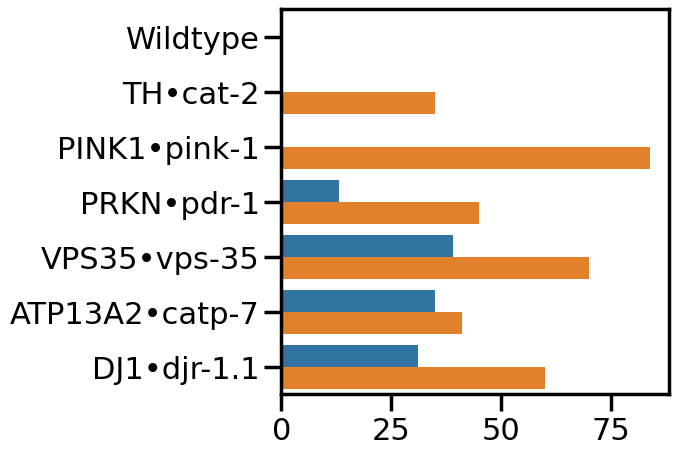

In [30]:
Title = "" #<---------------- Input Here -----------------
FileName = "Rounded CEP Bodies"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(5, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="% Worms", 
                 y = 'Genotype', 
                 data = RoundedCEP, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Age',
                 # palette = [sns.color_palette()[1],'black'],
                 # palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = False,
                 orient="y"
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [31]:
MeanChangeData = pd.read_csv(chooser.selected)
print(MeanChangeData)

                Category  Change
0   Curved CEP Dendrites       7
1   Curved CEP Dendrites       6
2   Curved CEP Dendrites      16
3   Curved CEP Dendrites      17
4   Curved CEP Dendrites      10
..                   ...     ...
65      Curved ADE Axons      20
66      Curved ADE Axons       3
67      Curved ADE Axons       7
68      Curved ADE Axons      40
69      Curved ADE Axons      -7

[70 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

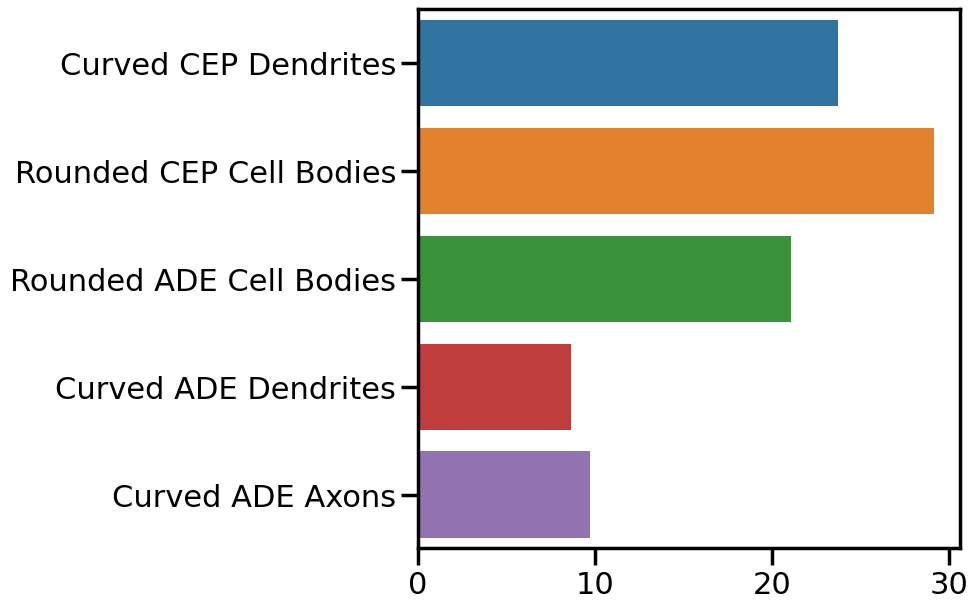

In [34]:
Title = "" #<---------------- Input Here -----------------
FileName = "MeanChange4DOto7DO"
sns.set_context("poster")
plt.figure(linewidth = 1)
plt.figure(figsize=(7, 7))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Change", 
                 y = 'Category', 
                 data = MeanChangeData, #<--------------- Input Here -------------
             # color = 'CornflowerBlue',
                 hue = 'Category',
                 # palette = [sns.color_palette()[1],'black'],
                 # palette = ['black',sns.color_palette()[0],sns.color_palette()[1]],
                 legend = False,
                 orient="y",
                 errorbar=None
             # edgecolor="DodgerBlue",
             # linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel("")
# plt.xticks(rotation=90)
plt.ylabel("")
# plt.ylim(top = 0.2)
# plt.ylim(bottom = -0.03)
plt.title("")
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'/Users/Joseph/Desktop/{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()